In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.7 MB/s eta 0:00:00


In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# NLP & ML
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Toxicity & source
import requests
# Core libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
true_df = pd.read_csv('/content/True.csv')
fake_df = pd.read_csv('/content/Fake.csv')

true_df['label'] = 1
fake_df['label'] = 0

df = pd.concat([true_df, fake_df]).sample(frac=1).reset_index(drop=True)


For fake news: high precision avoids false accusations.

For spam detection: high recall avoids missing any spam.

**1. TRUTH AND ACCURACY**

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4658
           1       0.98      0.99      0.99      4322

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



**2. INDEPENDENCE- SOURCE BIAS CHECKER**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import pandas as pd

df = pd.read_excel('/content/annotations.xlsx')
df = df[['outlet', 'label', 'text', 'link', 'political_ideology']]
df.head()


,outlet,label,text,link,political_ideology
0,breitbart,Non-biased,The transgender effort to suppress any recogni...,https://www.breitbart.com/politics/2019/02/21/...,7
1,alternet,Non-biased,Radical Virginia Citizens Defense League has o...,https://www.alternet.org/2020/01/pro-gun-prote...,7
2,msnbc,Non-biased,Miller is the architect of President Donald Tr...,https://www.nbcnews.com/news/latino/after-step...,7
3,breitbart,Non-biased,"The House Democrats’ 1,400-page coronavirus re...",https://www.breitbart.com/politics/2020/03/24/...,7
4,federalist,Non-biased,A specter is haunting the West; our elites see...,https://thefederalist.com/2019/11/08/nationali...,7


In [ ]:
df['label'].value_counts()


,count
label,
Biased,10651
Non-biased,7124


In [ ]:
bias_map = {
    'left': -1,
    'center': 0,
    'right': 1,
    'biased': 1,
    'neutral': 0,
    'unbiased': 0,
    # adjust based on actual values in `label`
}
df['bias_score'] = df['label'].map(bias_map)


new one


In [ ]:
!pip install scrapy beautifulsoup4 pandas anonymizer


  Using cached Scrapy-2.12.0-py2.py3-none-any.whl.metadata (5.3 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.5 MB/s eta 0:00:00
  Created wheel for anonymizer: filename=anonymizer-0.0.6-py3-none-any.whl size=8753 sha256=5c5ea7eef8be34cdcdc4ea9b671c3fc52f5e2fd91cfcf92b2215137db4eb1d0a
  Stored in directory: /root/.cache/pip/wheels/45/24/69/ee896a29a1dfbcd23175fe861d0801c04496018a3d4c377d56
Successfully built anonymizer


**to return ethically scraped public articles**

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

def ethical_scraper(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Exclude private content
        private_content = soup.find_all(class_=re.compile('private|restricted'))
        public_content = [c for c in soup.find_all('article') if c not in private_content]
        return public_content

In [ ]:
!pip install anonymizer


In [ ]:
# K-anonymity implementation
   from anonymizer import Anonymizer
   import pandas as pd

   def anonymize_data(df, sensitive_columns):
       anonymizer = Anonymizer(df)
       return anonymizer.k_anonymize(k=3, columns=sensitive_columns)

   # Example usage
   df = pd.read_csv('journalism_data.csv')
   safe_df = anonymize_data(df, ['location', 'age'])


In [ ]:
import nltk
nltk.download('punkt_tab') # Download the 'punkt_tab' data
from scipy.stats import chisquare
import pandas as pd

# Download required NLTK resources
nltk.download('opinion_lexicon')
nltk.download('punkt')

from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

def calculate_bias(text):
    pos_words = set(opinion_lexicon.positive())
    neg_words = set(opinion_lexicon.negative())

    tokens = word_tokenize(text.lower())  # Lowercase for matching
    word_counts = FreqDist(tokens)

    pos_count = sum(word_counts[w] for w in pos_words if w in word_counts)
    neg_count = sum(word_counts[w] for w in neg_words if w in word_counts)

    if pos_count + neg_count == 0:
        return {"pos": 0, "neg": 0, "bias": "No opinion words", "p_value": None}

    result = chisquare([pos_count, neg_count])
    return {
        "pos": pos_count,
        "neg": neg_count,
        "bias": "Positive" if pos_count > neg_count else "Negative" if neg_count > pos_count else "Neutral",
        "p_value": result.pvalue
    }

# Example: Test it on a sample text
sample = "The economy is amazing, but the leadership is corrupt and unfair."
print(calculate_bias(sample))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'pos': 1, 'neg': 1, 'bias': 'Neutral', 'p_value': np.float64(1.0)}


In [ ]:
import pandas as pd

# Try specifying a different delimiter, or using the 'error_bad_lines' argument
df = pd.read_csv('/content/bbc-news-data.csv', sep='\t')  # or sep=',', etc.
# Alternatively, if you want to keep the bad lines, use 'warn' instead of 'skip'
#df = pd.read_csv('/content/bbc-news-data.csv', sep=',', on_bad_lines='warn')  # or sep='\t', etc.

df.head()


,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
print(df.columns)


Index(['category', 'filename', 'title', 'content'], dtype='object')


In [ ]:
df['bias_result'] = df['content'].apply(calculate_bias)
df['bias_label'] = df['bias_result'].apply(lambda x: x['bias'])


<ipython-input-58-fe34783eeaf7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bias_label', data=df, palette='pastel')


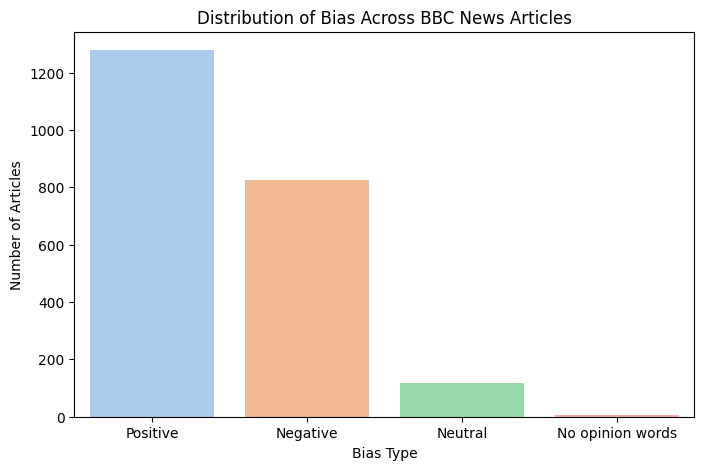

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='bias_label', data=df, palette='pastel')
plt.title('Distribution of Bias Across BBC News Articles')
plt.xlabel('Bias Type')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
!pip install lifelines


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.2 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=fc5e5094769ceea12006d9035eddb4c74501b61beae5cfbd4d7d47bf78b45056
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


churn means:

A reader stops visiting the news site

A subscriber cancels their membership

A viewer stops interacting with news on social media

In [ ]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Simulate dummy 'engagement duration' and 'churn' status
np.random.seed(42)  # for reproducibility
df['days_subscribed'] = np.random.randint(1, 100, size=len(df))  # how many days it was read or relevant
df['churned'] = np.random.choice([1, 0], size=len(df), p=[0.7, 0.3])  # 70% churned, 30% still engaging


**a Kaplan-Meier survival curve of user retention.**

The curve shows how long articles tend to stay engaging.

A steeper drop means quick drop-off in interest.

Flattening tail means some articles maintain long-term value.

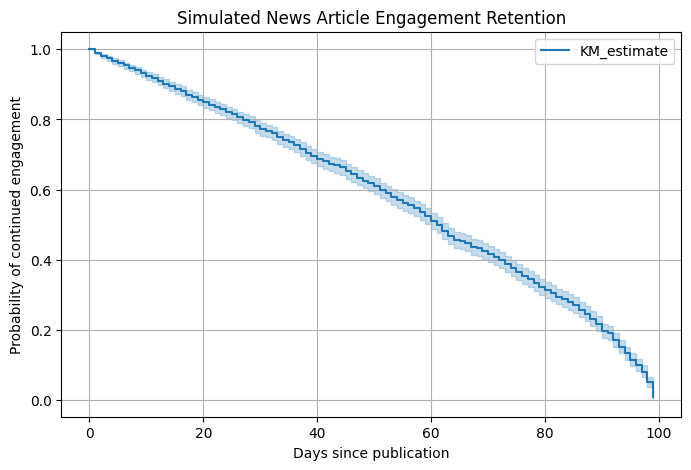

In [ ]:
# Initialize Kaplan-Meier model
kmf = KaplanMeierFitter()

# Fit model
kmf.fit(durations=df['days_subscribed'], event_observed=df['churned'])

# Plot survival (retention) function
plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title('Simulated News Article Engagement Retention')
plt.xlabel('Days since publication')
plt.ylabel('Probability of continued engagement')
plt.grid(True)
plt.savefig('churn_analysis.png')
plt.show()


In [ ]:
!pip install Jinja2


In [ ]:
import pandas as pd
from jinja2 import Template
from datetime import datetime
import random

# Simulate 'location' and 'date' columns
locations = ['London', 'New York', 'Delhi', 'Paris', 'Berlin', 'Toronto']
df['location'] = [random.choice(locations) for _ in range(len(df))]
df['date'] = datetime.today().strftime('%Y-%m-%d')
df['summary'] = df['content'].str.slice(0, 150) + '...'  # First 150 chars as summary

# Template for report
template = Template("""
📰 Breaking News: {{ headline }}
📍 Location: {{ location }}
📅 Date: {{ date }}
📝 Summary: {{ summary }}
""")

# Function to generate one news report
def generate_news_report(data):
    return template.render(**data)

# Apply it to each row
df['report'] = df.apply(lambda row: generate_news_report({
    'headline': row['title'],
    'location': row['location'],
    'date': row['date'],
    'summary': row['summary']
}), axis=1)

# Show a few sample reports
for i, report in enumerate(df['report'].head(3), 1):
    print(f"\n--- News Report {i} ---\n{report}")



--- News Report 1 ---

📰 Breaking News: Ad sales boost Time Warner profit
📍 Location: Berlin
📅 Date: 2025-04-05
📝 Summary:  Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, wh...

--- News Report 2 ---

📰 Breaking News: Dollar gains on Greenspan speech
📍 Location: Toronto
📅 Date: 2025-04-05
📝 Summary:  The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabi...

--- News Report 3 ---

📰 Breaking News: Yukos unit buyer faces loan claim
📍 Location: Delhi
📅 Date: 2025-04-05
📝 Summary:  The owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (£479m) loan.  State-owned Ros...


In [ ]:
!pip install dash plotly nltk pandas


In [ ]:
import nltk
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
nltk.download('opinion_lexicon')
nltk.download('punkt')

def calculate_bias_score(text):
    pos_words = set(opinion_lexicon.positive())
    neg_words = set(opinion_lexicon.negative())
    words = word_tokenize(str(text).lower())

    pos_count = sum(1 for w in words if w in pos_words)
    neg_count = sum(1 for w in words if w in neg_words)
    total = pos_count + neg_count

    if total == 0:
        return 0  # Neutral
    return (pos_count - neg_count) / total  # Positive = bias toward positivity, Negative = negativity


[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

# For demo: Add fake dates (or use your own if available)
df['date'] = pd.date_range(end=pd.Timestamp.today(), periods=len(df))

# Compute bias score
df['bias_score'] = df['content'].apply(calculate_bias_score)

# Group by date to get average bias
trend_df = df.groupby(df['date'].dt.date)['bias_score'].mean().reset_index()
trend_df.columns = ['Date', 'Bias Score']


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Initialize app
app = dash.Dash(__name__)
app.title = "BBC Bias Trend"

# Layout
app.layout = html.Div([
    html.H2("BBC News Bias Trend"),
    dcc.Graph(id='bias-trend'),
    dcc.Interval(id='interval', interval=86400000, n_intervals=0),  # Daily refresh
])

# Callback to update graph
@app.callback(
    Output('bias-trend', 'figure'),
    Input('interval', 'n_intervals')
)
def update_graph(n):
    fig = px.line(trend_df, x='Date', y='Bias Score', title='Bias Score Over Time')
    fig.update_layout(yaxis_title='Bias Score (pos-neg)', xaxis_title='Date')
    return fig

# Run server
app.run(debug=False, port=8050)


<IPython.core.display.Javascript object>